**Customer Segmentation Project**

Data - https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Description of project - Using k-means clustering for customer segmentation

*Import packages*

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

*Upload data and explore*

In [47]:
df = pd.read_csv('marketing_campaign.csv')
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


In [48]:
df = pd.read_csv('marketing_campaign.csv', sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [50]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [51]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [52]:
df['ID'].nunique()

2240

24 rows missing income, checked to see if any of the customers had any other entries in the table to copy the income from.  However each ID only appears once so will drop those rows without income.

In [53]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [54]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


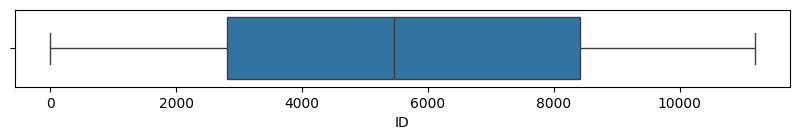

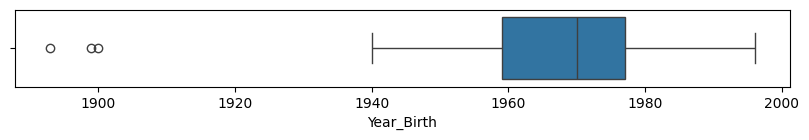

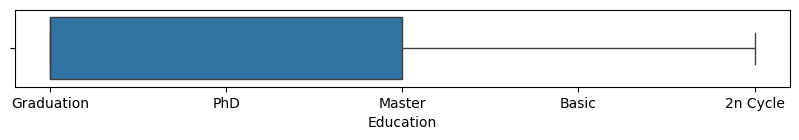

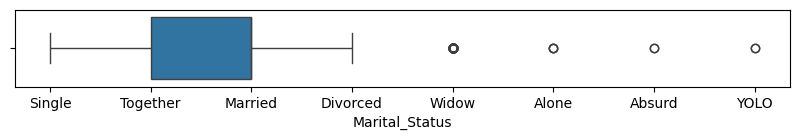

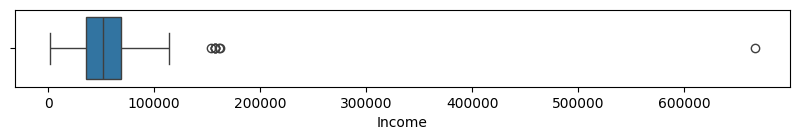

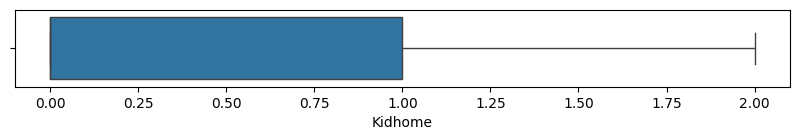

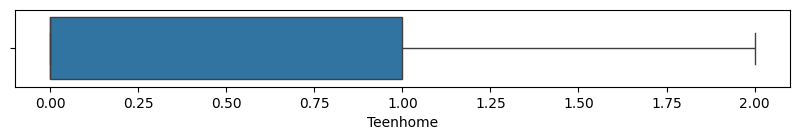

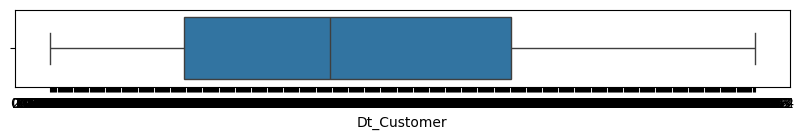

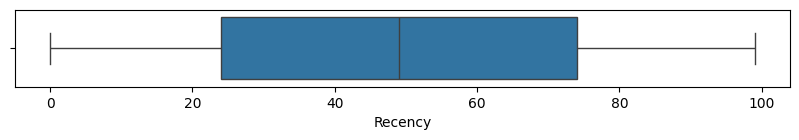

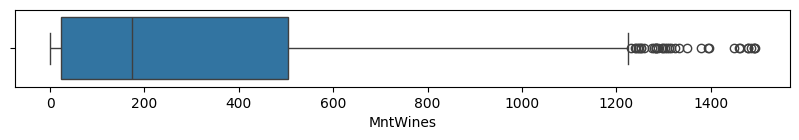

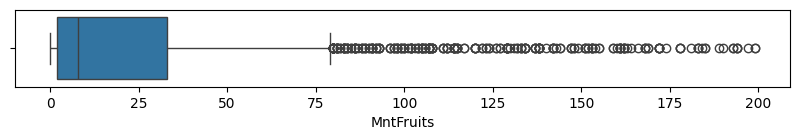

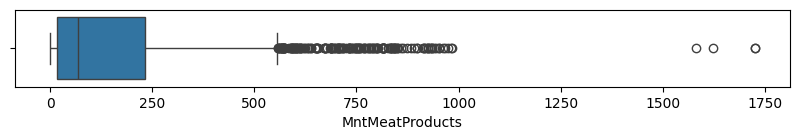

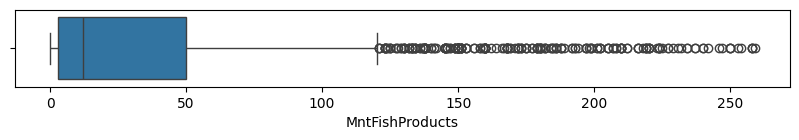

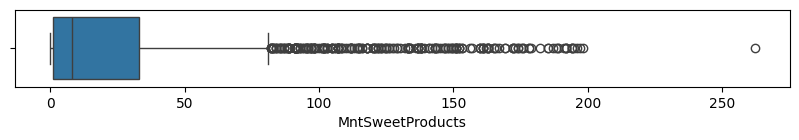

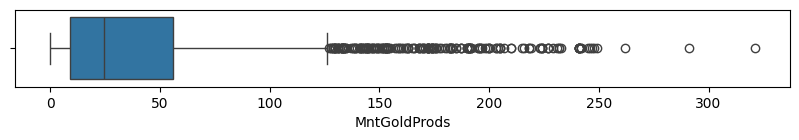

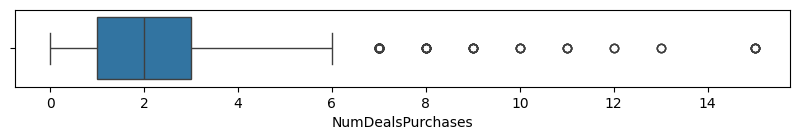

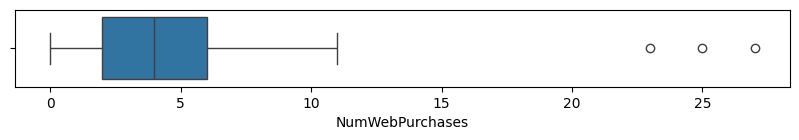

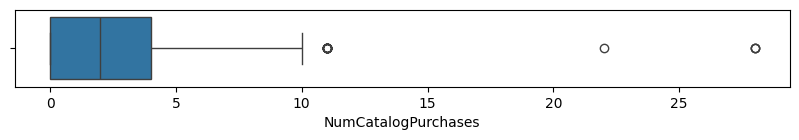

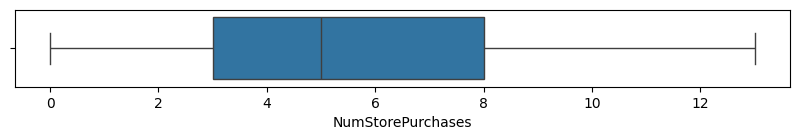

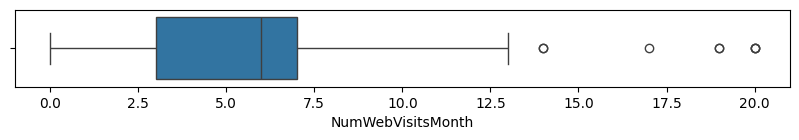

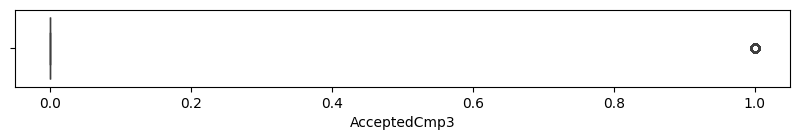

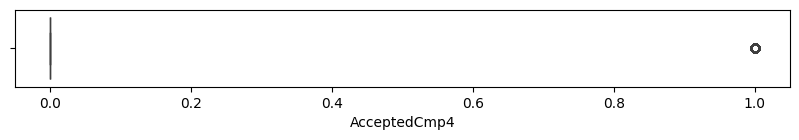

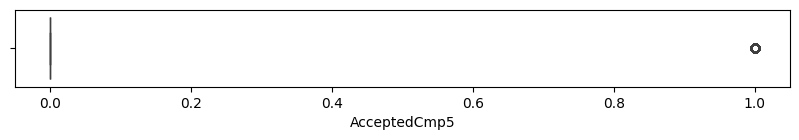

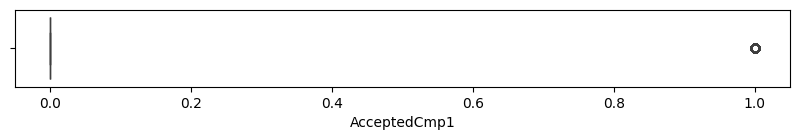

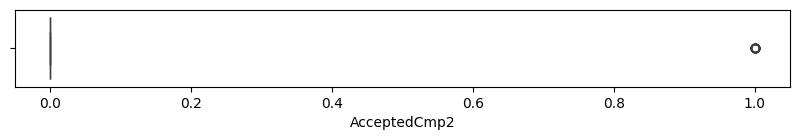

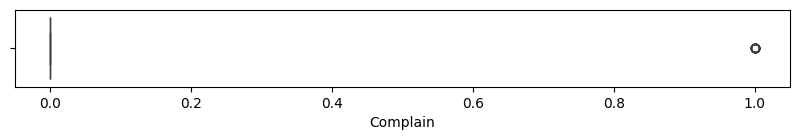

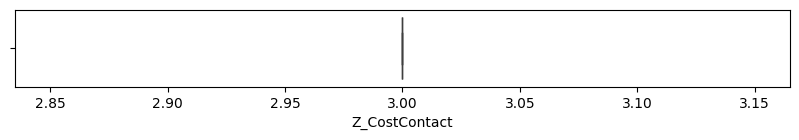

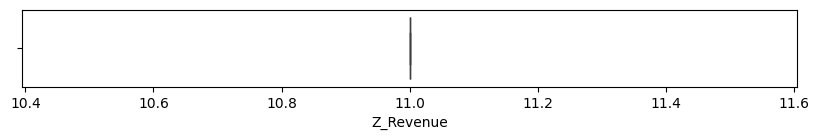

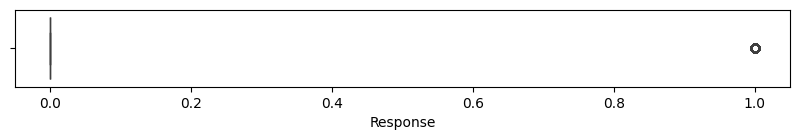

In [55]:
col_names = list(df)
for col in col_names:
    plt.figure(figsize=(10, 1))
    ax = sns.boxplot(x=df[col])
    plt.show()

In [56]:
df[['Z_CostContact', 'Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


Z columns not relevant so will be dropped

In [57]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df.shape

C:\Users\carth\AppData\Local\Temp\ipykernel_25496\302380435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


(2216, 27)

Year_Birth a few outliers.  Data uploaded in 2021 so unlikely to find people born at or before 1900

In [58]:
df.sort_values("Year_Birth")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,6,4,1,0,0,1,0,0,0,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,1,2,5,0,0,0,0,0,1,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,1,4,5,0,0,0,0,0,0,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,10,5,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,4427,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,...,10,12,6,1,0,1,0,0,1,1
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,0,2,6,0,0,0,0,0,0,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,...,6,8,2,0,0,0,0,0,0,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,1,3,9,0,0,0,0,0,0,1


In [59]:
df = df[df.Year_Birth>1900]

Also looks like there's an outlier in income

In [60]:
df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [61]:
df["Income"].sort_values(ascending=False)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
          ...   
1975      4428.0
1846      4023.0
1524      3502.0
21        2447.0
1245      1730.0
Name: Income, Length: 2213, dtype: float64

Possible that the salary is 666,666 (don't know currency).  However given the nature of the number and that it's 500,000 higher than the others, this seems to be an outlier that will be dropped.

In [62]:
df = df[df.Income<170000]

In [63]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


Looking at the options for Marital_Status and Education

In [64]:
marital_list = df['Marital_Status'].unique()
print(f'Options for marital status are: {marital_list}' )
ed_list = df['Education'].unique()
print(f'Options for education are: {ed_list}' )

Options for marital status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Options for education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Marital status - replacing Alone with single and dropping the other two  
Education - 2n Cycle presumed to be the equivalent of a Master so replacing that  
No other examples of using these words for other columns so no danger of replacing wrong thing

In [65]:
df = df.replace(['Alone', '2n Cycle'], ['Single', 'Master'])

In [66]:
df = df[df['Marital_Status'] != 'YOLO']
df = df[df['Marital_Status'] != 'Absurd']

In [67]:
marital_list = df['Marital_Status'].unique()
print(f'Options for marital status are: {marital_list}' )
ed_list = df['Education'].unique()
print(f'Options for education are: {ed_list}' )

Options for marital status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Options for education are: ['Graduation' 'PhD' 'Master' 'Basic']


Showing the data again to check after cleaning

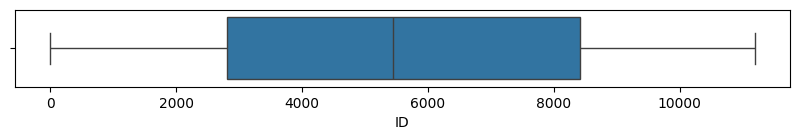

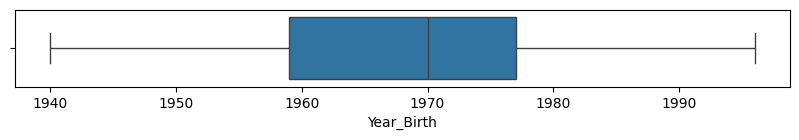

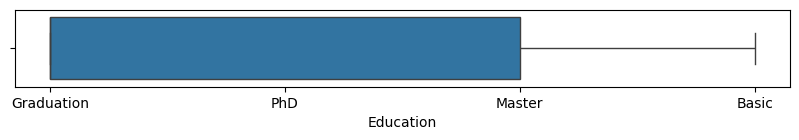

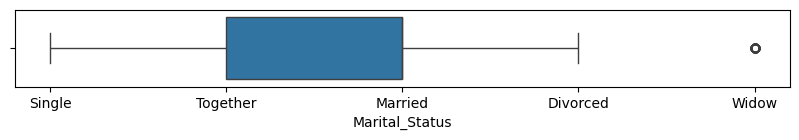

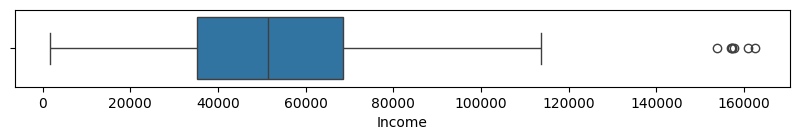

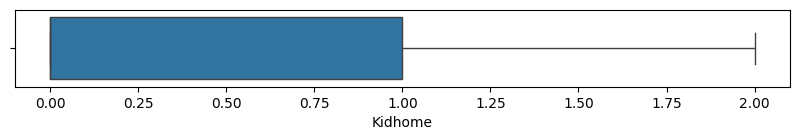

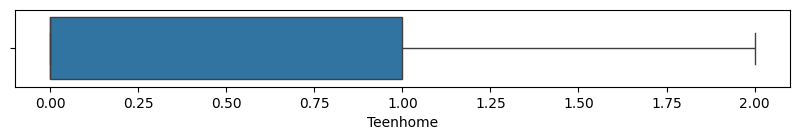

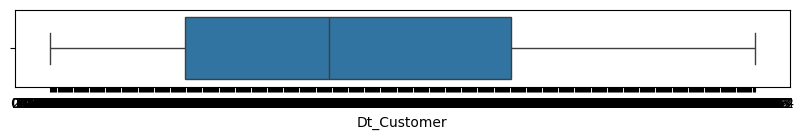

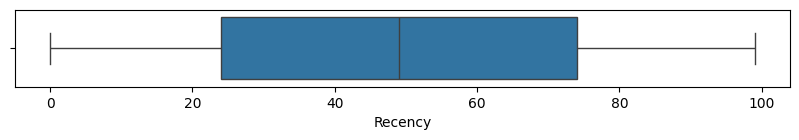

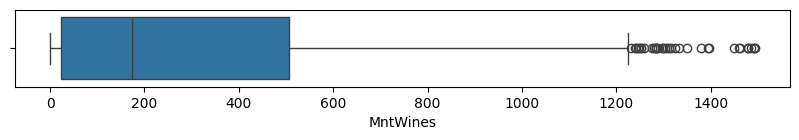

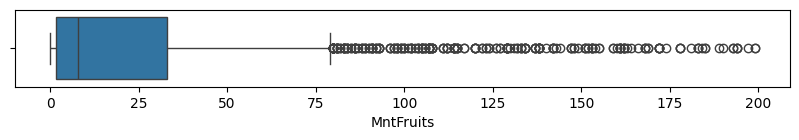

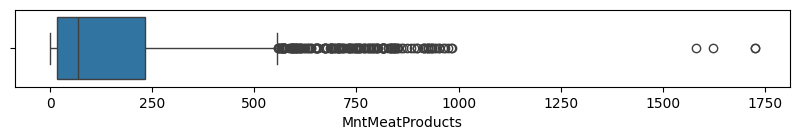

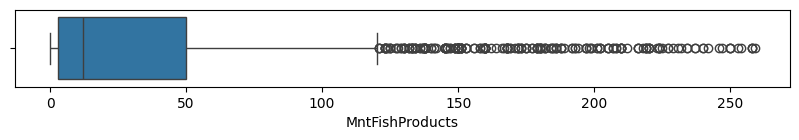

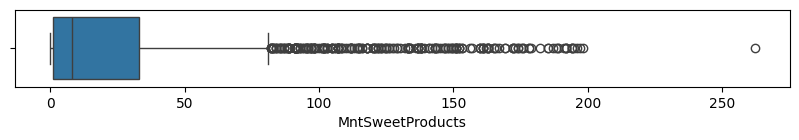

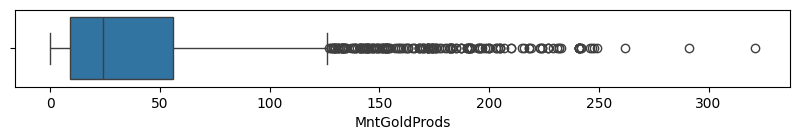

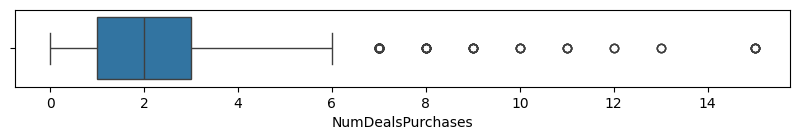

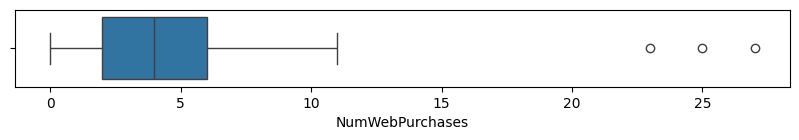

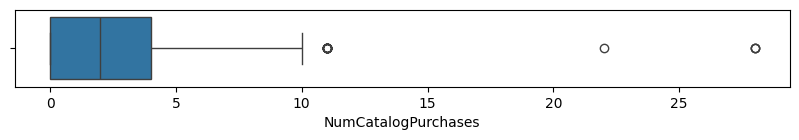

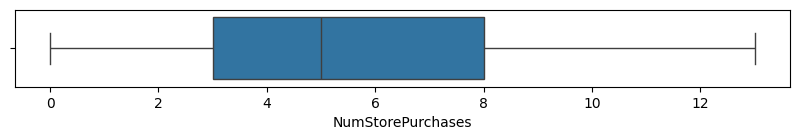

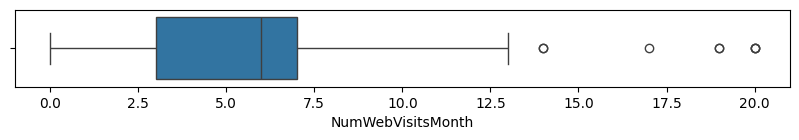

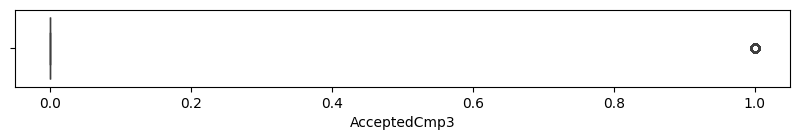

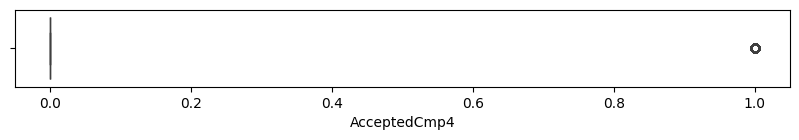

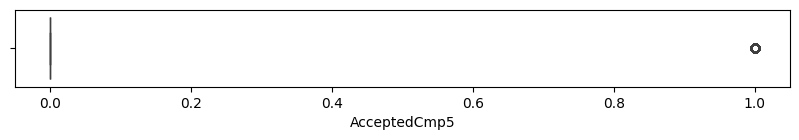

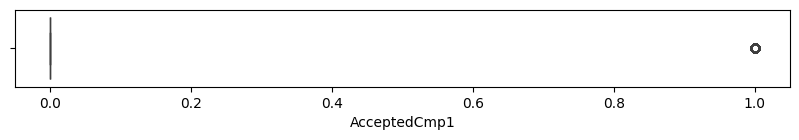

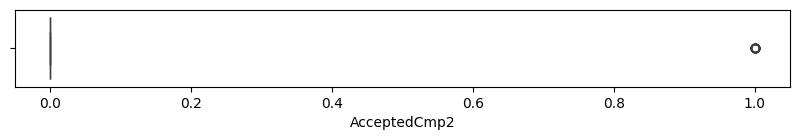

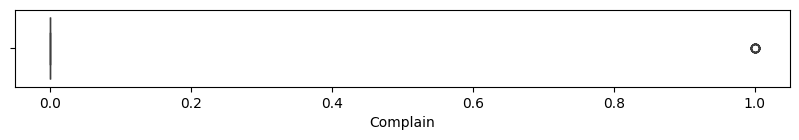

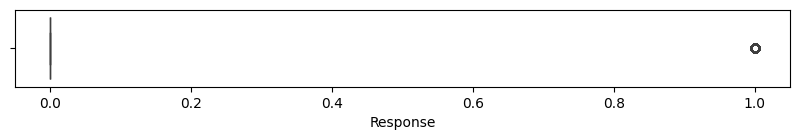

In [68]:
col_names = list(df)
for col in col_names:
    plt.figure(figsize=(10, 1))
    ax = sns.boxplot(x=df[col])
    plt.show()

Visualisation and preprocessing

Converting the categorical features with labels to numerical values for Education and Marital Status

In [69]:
le = LabelEncoder()
education_label = le.fit_transform(df['Education'])
print(f'education labels: {education_label}')

le = LabelEncoder()
marital_label = le.fit_transform(df['Marital_Status'])
print(f'marital labels: {marital_label}')

education labels: [1 1 1 ... 1 2 3]
marital labels: [2 2 3 ... 0 3 1]


In [70]:
df.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

In [71]:
df['Education'] = education_label
df['Marital_Status'] = marital_label

In [72]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,7,0,0,0,0,0,0,1,1,2
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,5,0,0,0,0,0,0,0,1,2
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,4,0,0,0,0,0,0,0,1,3
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,6,0,0,0,0,0,0,0,1,3
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,5,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,13-06-2013,46,709,43,182,...,5,0,0,0,0,0,0,0,1,1
2236,4001,1946,64014.0,2,1,10-06-2014,56,406,0,30,...,7,0,0,0,1,0,0,0,3,3
2237,7270,1981,56981.0,0,0,25-01-2014,91,908,48,217,...,6,0,1,0,0,0,0,0,1,0
2238,8235,1956,69245.0,0,1,24-01-2014,8,428,30,214,...,3,0,0,0,0,0,0,0,2,3


In [73]:
type(df['Dt_Customer'][0])

str

In [74]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y' )

Can't use a date in the input data so need to turn this into a value - Will take it as number of days after the 1st customer

In [75]:
first_cust_date = df['Dt_Customer'].min()

If we take the date away from the customer date it gives a timedelta data type so will access just the days below as integers

In [76]:
df['Days_since'] = (df['Dt_Customer']-first_cust_date).dt.days

In [77]:
df.drop('Dt_Customer', axis=1, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Income               2208 non-null   float64
 3   Kidhome              2208 non-null   int64  
 4   Teenhome             2208 non-null   int64  
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   int64 

In [79]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status,Days_since
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1,2,36
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,1,2,586
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,3,387
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,3,560
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,3,1,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,0,1,1,318
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,3,3,680
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,1,0,544
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,2,3,543


All columns are now numerical and need normalisation/ standardisation.  Will do both below and compare the results

Normalisation

In [80]:
#Using minmax scaler on all columns but ID
scale_columns = list(df)
scale_columns = scale_columns[1:]
scale_columns

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Education',
 'Marital_Status',
 'Days_since']

Stan Scaled

In [81]:
stan_scaler = StandardScaler()
stan_scaled_values = stan_scaler.fit_transform(df[scale_columns])

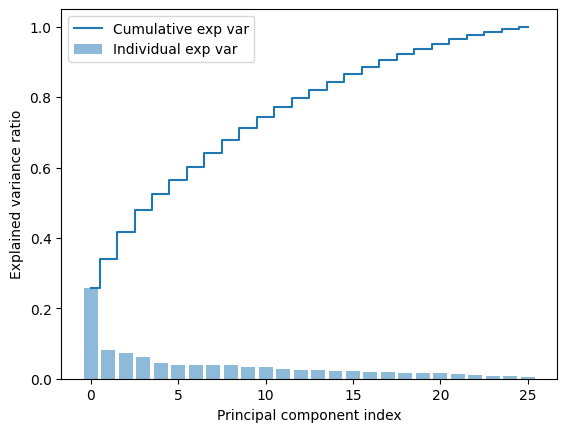

In [82]:
pca = PCA()
x= pca.fit_transform(stan_scaled_values)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual exp var')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative exp var')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

In [83]:
pca = PCA(n_components=3)
X_stan_pca = pca.fit_transform(stan_scaled_values)

# Step 3: Determine the Number of Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

pc_stan_df = pd.DataFrame(X_stan_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

Explained Variance Ratio: [0.25897875 0.0822459  0.07418684]


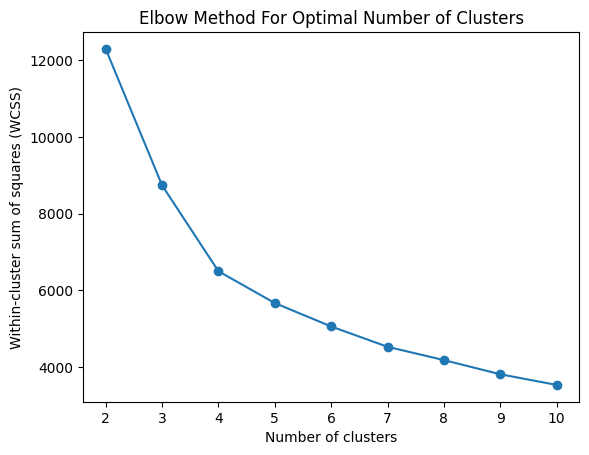

In [84]:
min_clusters = 2
max_clusters = 10
range_n_clusters = range(min_clusters, max_clusters + 1)

wcss = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit the model
    kmeans.fit(X_stan_pca)
    # Compute the within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xticks(range_n_clusters)
plt.show()

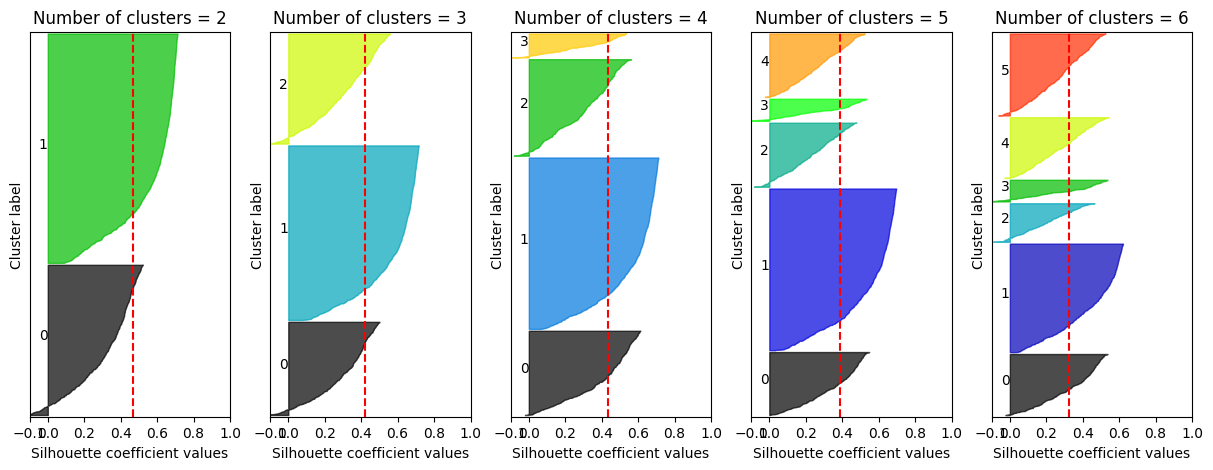

In [85]:
# Define range of cluster numbers to try
range_n_clusters = [2, 3, 4, 5, 6]

# Create subplot layout
fig, axs = plt.subplots(1, len(range_n_clusters), figsize=(15, 5))

for idx, n_clusters in enumerate(range_n_clusters):
    # Initialize the KMeans object with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=7)
    cluster_labels = clusterer.fit_predict(X_stan_pca)

    # Compute the average silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_stan_pca, cluster_labels)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_stan_pca, cluster_labels)

    # Plot silhouette plot
    y_lower = 10
    axs[idx].set_xlim([-0.1, 1])
    axs[idx].set_ylim([0, len(X_stan_pca) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        axs[idx].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axs[idx].set_title("Number of clusters = {}".format(n_clusters))
    axs[idx].set_xlabel("Silhouette coefficient values")
    axs[idx].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[idx].set_yticks([])  # Clear the yaxis labels / ticks
    axs[idx].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [86]:
k = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=7)
clusters = kmeans.fit_predict(X_stan_pca)

pc_stan_df['Cluster'] = clusters
df['Clusters']= clusters

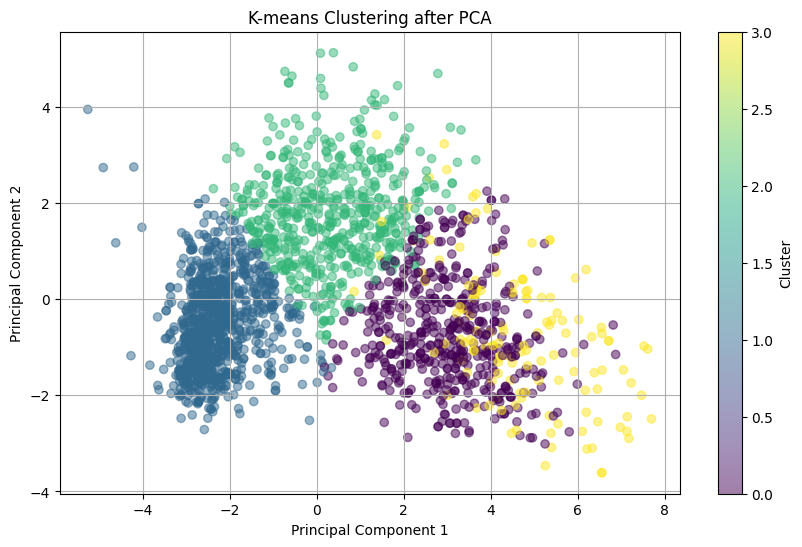

In [87]:
# Extract the PCA components and cluster labels from the pca_df DataFrame
x_stan_pca1 = pc_stan_df['Principal Component 1']
x_stan_pca2 = pc_stan_df['Principal Component 2']
clusters = pc_stan_df['Cluster']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_stan_pca1, x_stan_pca2, c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Text(0.5, 0, 'PC3')

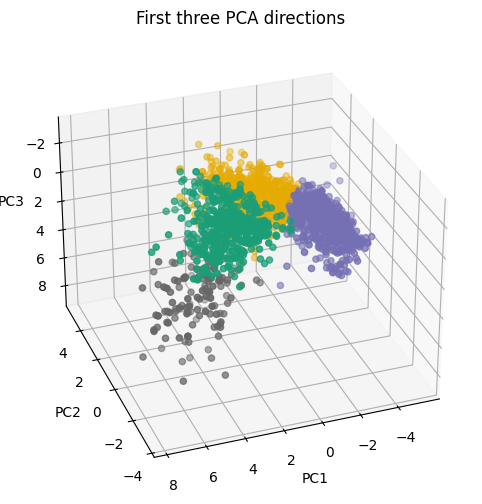

In [88]:
x_stan_pca3 = pc_stan_df['Principal Component 3']

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    x_stan_pca1,
    x_stan_pca2,
    x_stan_pca3,
    c=clusters,
    cmap='Dark2',
)

ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

MinMaxScaled version

In [89]:
mm_scaler = MinMaxScaler()
mm_scaled_values = mm_scaler.fit_transform(df[scale_columns])

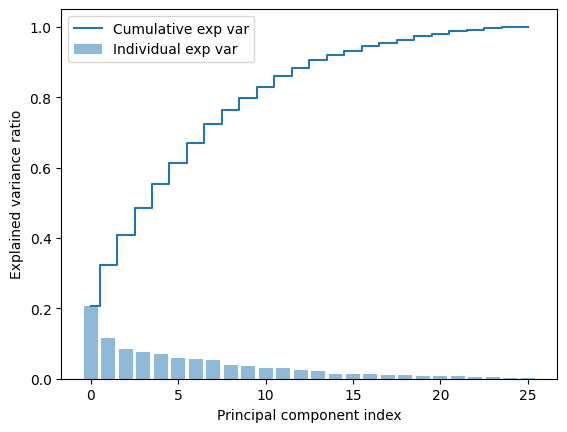

In [90]:
pca = PCA()
x= pca.fit_transform(mm_scaled_values)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual exp var')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative exp var')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

In [91]:
pca = PCA(n_components=3)
X_mm_pca = pca.fit_transform(mm_scaled_values)

# Step 3: Determine the Number of Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

pc_mm_df = pd.DataFrame(X_mm_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

Explained Variance Ratio: [0.20601986 0.11695611 0.08468008]


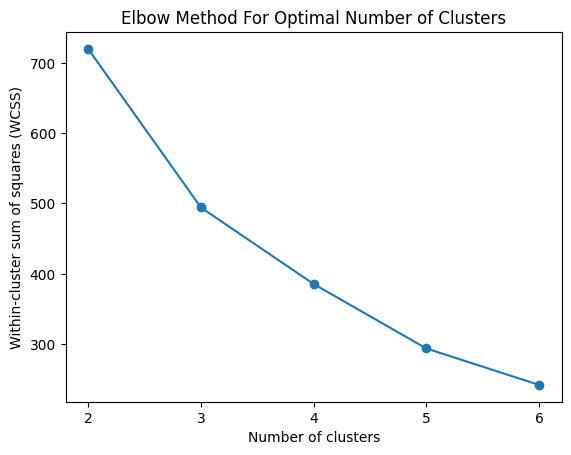

In [92]:
wcss = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit the model
    kmeans.fit(X_mm_pca)
    # Compute the within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xticks(range_n_clusters)
plt.show()

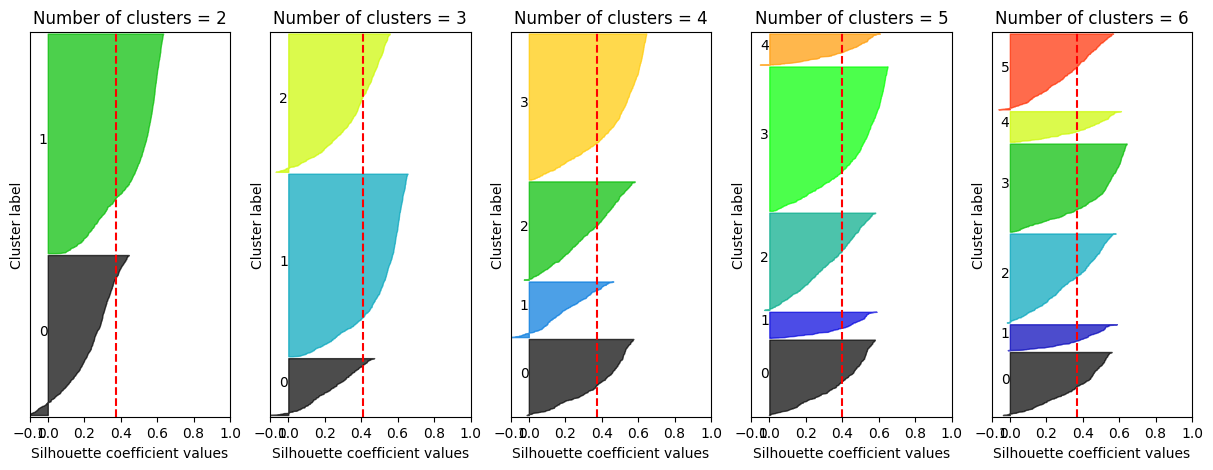

In [93]:
# Define range of cluster numbers to try
range_n_clusters = [2, 3, 4, 5, 6]

# Create subplot layout
fig, axs = plt.subplots(1, len(range_n_clusters), figsize=(15, 5))

for idx, n_clusters in enumerate(range_n_clusters):
    # Initialize the KMeans object with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=7)
    cluster_labels = clusterer.fit_predict(X_mm_pca)

    # Compute the average silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_mm_pca, cluster_labels)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_mm_pca, cluster_labels)

    # Plot silhouette plot
    y_lower = 10
    axs[idx].set_xlim([-0.1, 1])
    axs[idx].set_ylim([0, len(X_mm_pca) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        axs[idx].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axs[idx].set_title("Number of clusters = {}".format(n_clusters))
    axs[idx].set_xlabel("Silhouette coefficient values")
    axs[idx].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[idx].set_yticks([])  # Clear the yaxis labels / ticks
    axs[idx].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [97]:
k = 3  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=7)
clusters = kmeans.fit_predict(X_mm_pca)

pc_mm_df['Cluster'] = clusters

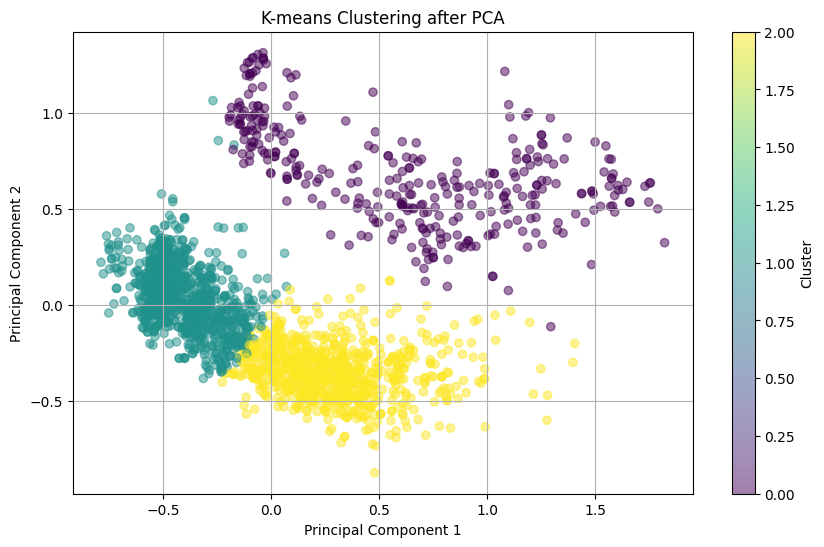

In [98]:
# Extract the PCA components and cluster labels from the pca_df DataFrame
x_mm_pca1 = pc_mm_df['Principal Component 1']
x_mm_pca2 = pc_mm_df['Principal Component 2']
clusters = pc_mm_df['Cluster']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_mm_pca1, x_mm_pca2, c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Text(0.5, 0, 'PC3')

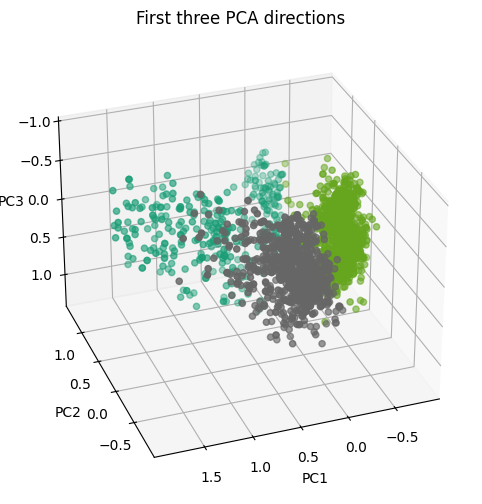

In [99]:
x_mm_pca3 = pc_mm_df['Principal Component 3']

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    x_mm_pca1,
    x_mm_pca2,
    x_mm_pca3,
    c=clusters,
    cmap='Dark2',
)

ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

**Still to do**  

Silhouette method - want to show plots

Then use clusters as the target variable and work out characteristics within said cluster